In [2]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [4]:
train=pd.read_csv("C:/Users/htadutwum/OneDrive - Youngstown State University/Academic Work/Internship/Titanic/train.csv")
test=pd.read_csv("C:/Users/htadutwum/OneDrive - Youngstown State University/Academic Work/Internship/Titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Datatype Info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop cabin because it has more null values. Names, passenger id, and ticket does not look so useful as the unique for each and may not have any predictive power

In [7]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Exploratory Data Analysis

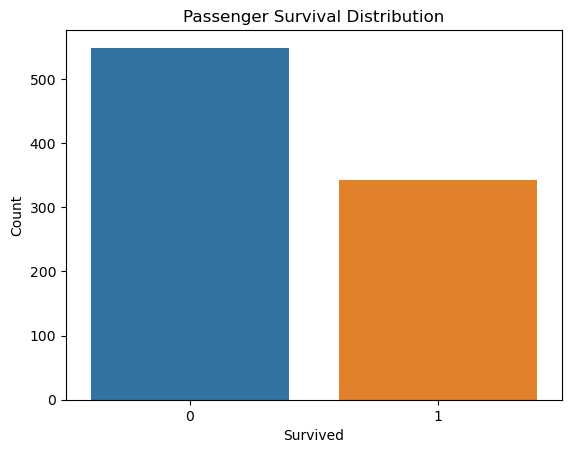

In [8]:
# Categorical Attributes
sns.countplot(train['Survived'])
plt.title('Passenger Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

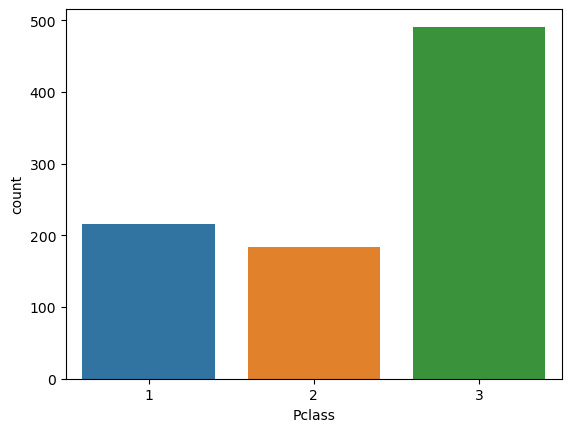

In [9]:
sns.countplot(train['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

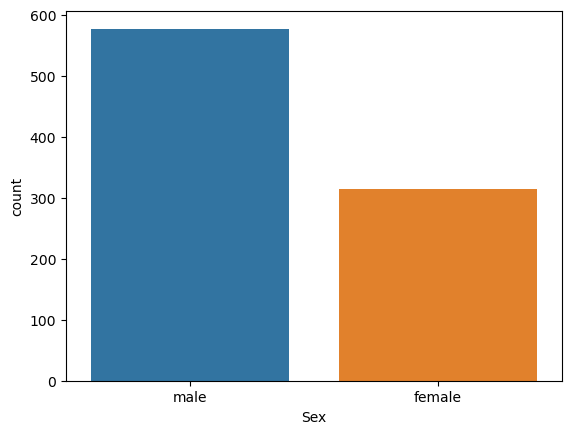

In [10]:
sns.countplot(train['Sex'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

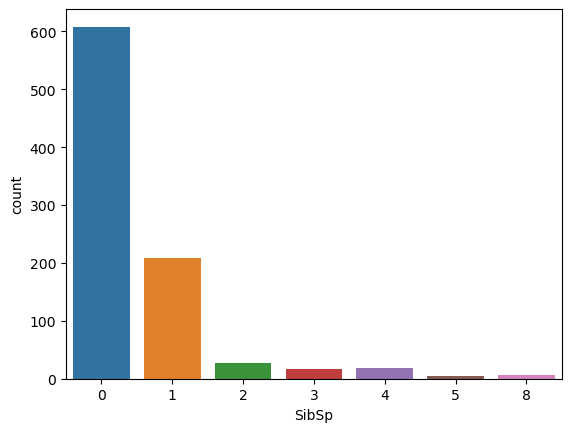

In [11]:
sns.countplot(train['SibSp'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

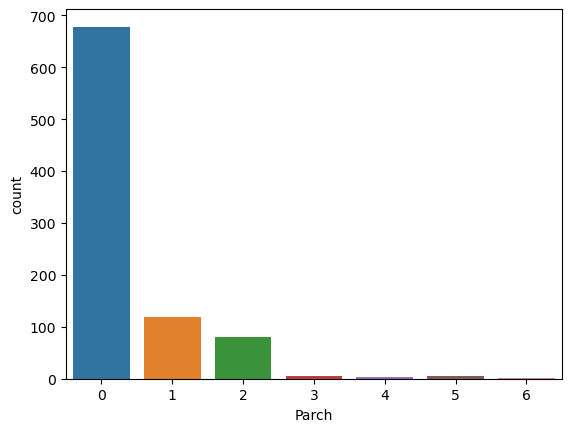

In [12]:
sns.countplot(train['Parch'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

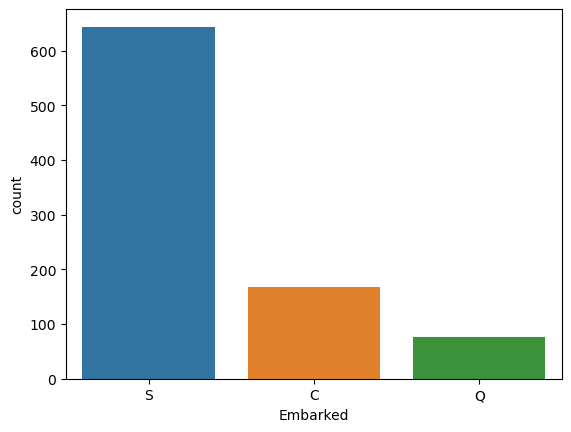

In [13]:
sns.countplot(train['Embarked'])

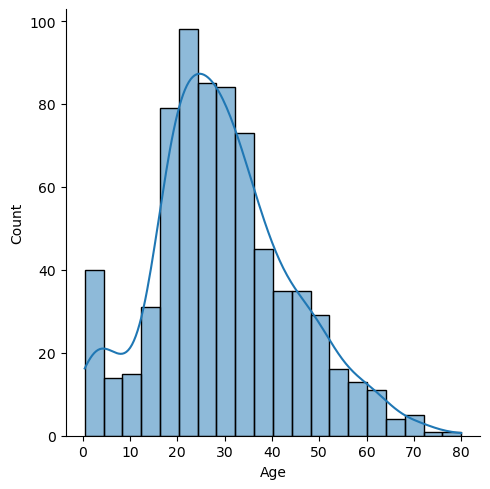

In [14]:
## Numerical Attributes
sns.displot(train.Age,kde=True)

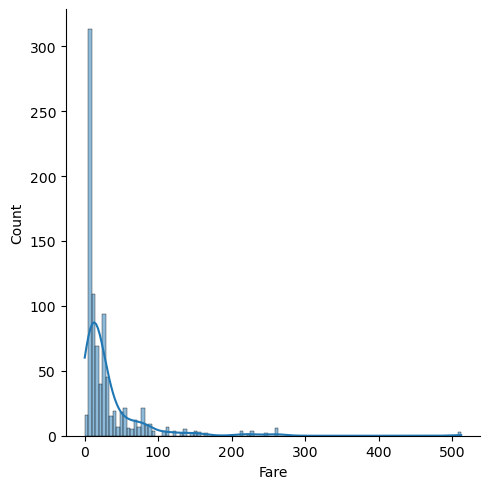

In [15]:
sns.displot(train.Fare,kde=True)

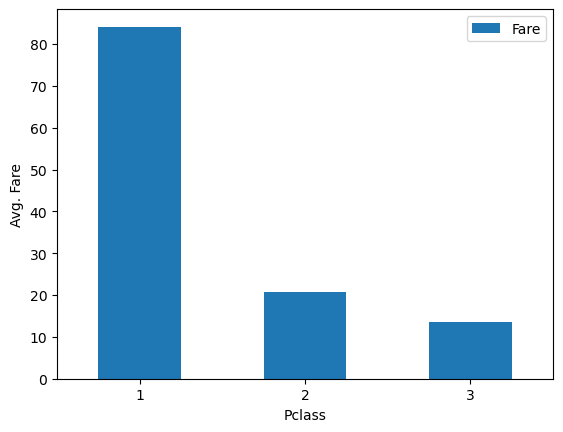

In [16]:
class_fare=train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

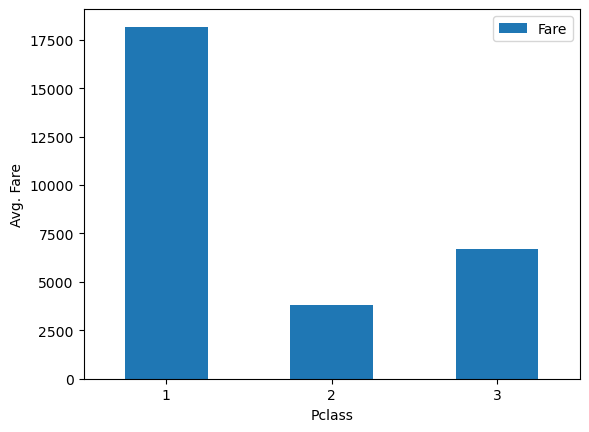

In [17]:
class_fare=train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

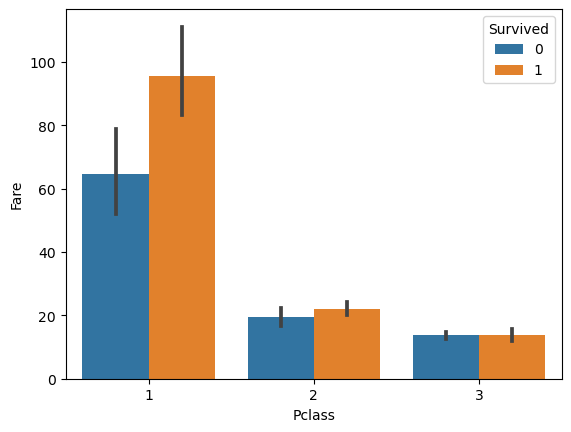

In [18]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

## Data PreProcessing


In [19]:
train_len=len(train)
df=pd.concat([train,test],axis=0)
df=df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.shape

(891, 12)

In [21]:
df.shape

(1309, 12)

In [22]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [23]:
## Find null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

- Drop cabin
- Find average for age
- Mean and mode for fare and embarked 

In [24]:
df= df.drop(columns=['Cabin'],axis=1)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [26]:
## filling missing values of age and fare with mean

df['Age']=df['Age'].fillna(df['Age'].median())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [27]:
## filling missing values of categorical variables with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


In [29]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

## Fearture Engineering

In [30]:
## log transformation for uniform distribution
df['Fare']=np.log(df['Fare']+1)

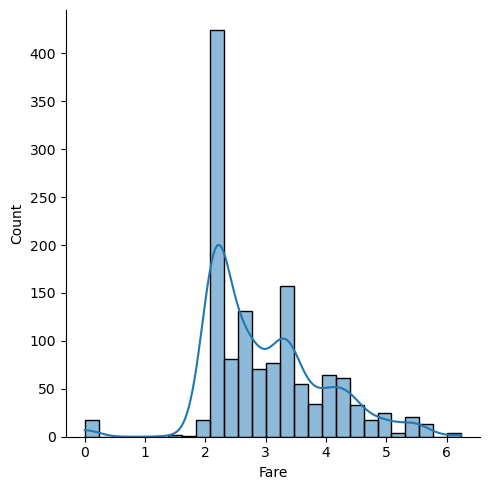

In [31]:
sns.displot(df.Fare,kde=True)

## Correlation Matrix

<AxesSubplot:>

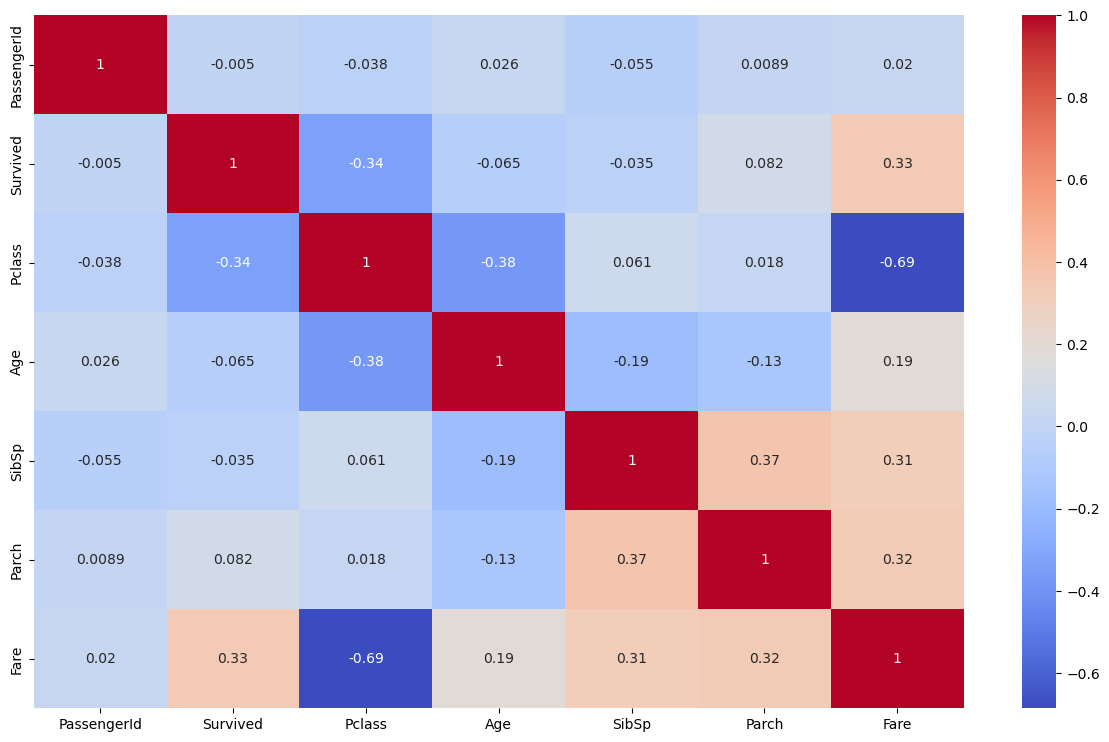

In [32]:
corr =df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap= 'coolwarm')

In [33]:
df=df.drop(columns=['Name','Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


Passengerid was left now because we need it for the one-hot encoding

## Label encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex','Embarked']
le= LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## Train Test Split

In [35]:
train=df.iloc[:train_len, :]
test= df.iloc[train_len:, :]

In [36]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [37]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [38]:
# input split
x=train.drop(columns=['PassengerId','Survived'])
y=train['Survived']

In [39]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## Model Training

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test= train_test_split( x,y, test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy:', model.score(x_test,y_test))
    
    score= cross_val_score(model, x, y, cv=5, scoring='accuracy') # training with 4 and test with 1
    print ('CV Score', np.mean(score))
    
    

In [41]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
classify(model, x, y)

Accuracy: 0.8071748878923767
CV Score 0.7856317870817902


In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y) 

Accuracy: 0.7354260089686099
CV Score 0.7766932395957568


In [43]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
classify(model, x, y)

Accuracy: 0.7892376681614349
CV Score 0.8103634423451134


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
model =ExtraTreesClassifier()
classify(model,x ,y)

Accuracy: 0.7847533632286996
CV Score 0.7912560416797438


In [45]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [46]:
from xgboost import XGBClassifier
model =XGBClassifier()
classify(model, x, y)

Accuracy: 0.7847533632286996
CV Score 0.8170861841692298


In [47]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
from lightgbm import LGBMClassifier
model =LGBMClassifier()
classify(model, x, y)

Accuracy: 0.820627802690583
CV Score 0.8260686711443098


In [49]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [50]:
from catboost import CatBoostClassifier
model =CatBoostClassifier(verbose=0)
classify(model, x, y)

Accuracy: 0.8340807174887892
CV Score 0.8249199673592367


## Complete Model Training and Prediction

In [51]:
model =LGBMClassifier()
model.fit(x,y)

LGBMClassifier()

In [52]:
x_test=test.drop(columns=['PassengerId','Survived'],axis=1)
y_test=test.Survived

In [53]:
pred=model.predict(x_test)

In [54]:
df=pd.DataFrame(y_test)

In [55]:
df.head()

,Survived
891,NaN
892,NaN
893,NaN
894,NaN
895,NaN


In [56]:
sub=pd.read_csv("C:/Users/htadutwum/OneDrive - Youngstown State University/Academic Work/Internship/Titanic/gender_submission.csv")

In [57]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [58]:
sub['Survived']=pred
sub['Survived']=sub['Survived'].astype('int')
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [61]:
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
sub.to_csv("C:/Users/htadutwum/OneDrive - Youngstown State University/Academic Work/Internship/Titanic/submission_group3.csv", index=False)